do correlation analysis in kreise and connect ones that have corr>0.8

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
cd ..

/Users/cinny/GitHub/Map-Tool


In [3]:
df = pd.read_csv('data/arbeitsmarktentwicklung.csv')

In [4]:
df.shape

(401, 228)

In [5]:
df.head(1)

,_id,ags2,bundesland,ags5,kreis,kr_ka_au_202001,kr_ka_au_202002,kr_ka_au_202003,kr_ka_au_202004,kr_ka_au_202005,...,kr_rlb_202007,kr_rlb_202008,kr_rlb_202009,kr_rlb_202010,kr_rlb_202011,kr_rlb_202012,kr_rlb_202101,kr_rlb_202102,kr_rlb_202103,kr_rlb_202104
0,1,1,Schleswig-Holstein,1001,"Flensburg, Stadt",0,0,185,758,70,...,11528,11401,11211,11018,10941,10988,11066,11165.082749,11193.617211,11111.999397


In [85]:
cols = []

for col in list(df.columns)[5:]:
    if col[:-7] not in cols:
        cols.append(col[:-7])

In [84]:
cols

['kr_ka_au',
 'kr_ka_ap',
 'kr_ka_ru',
 'kr_ka_rp',
 'kr_al',
 'kr_alq',
 'kr_svb_ao',
 'kr_svb_wo',
 'kr_ub',
 'kr_alga',
 'kr_ga',
 'kr_rlb']

In [ ]:
'kr_ka_au_202001'[:-7]

In [7]:
# fix ags5 code to be len=5, add 0 at front
def fix_ags5(x):
    if len(str(x))==4:
        return '0'+str(x)
    else:
        return str(x)
df['ags5'] = df['ags5'].apply(fix_ags5)

In [8]:
filter_col = [col for col in df if col.startswith('kr_alq_')]
#filter_col

In [9]:
'kr_ka_au_202001'[:-7]

'kr_ka_au'

In [10]:
df_kr_alq = df[['_id', 'ags2', 'bundesland', 'ags5', 'kreis'] + filter_col]

In [11]:
df_kr_alq = df_kr_alq.set_index('ags5')[filter_col]

In [12]:
df_kr_alq_corr = df_kr_alq.transpose().corr()
df_kr_alq_corr

ags5,01001,01002,01003,01004,01051,01053,01054,01055,01056,01057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
ags5,,,,,,,,,,,,,,,,,,,,,
01001,1.000000,0.895971,0.869306,0.857821,0.688320,0.916818,0.390461,0.384950,0.872014,0.854145,...,0.897264,0.802101,0.859229,0.857468,0.893061,0.742200,0.680475,0.450199,0.788869,0.181870
01002,0.895971,1.000000,0.941950,0.951443,0.675241,0.959015,0.362935,0.367374,0.959426,0.909284,...,0.930909,0.793176,0.895041,0.892008,0.907956,0.835756,0.748361,0.594005,0.791571,0.336349
01003,0.869306,0.941950,1.000000,0.974657,0.812141,0.954465,0.539002,0.531521,0.959130,0.895373,...,0.929705,0.871933,0.919933,0.923946,0.929235,0.934319,0.853749,0.703218,0.826093,0.388743
01004,0.857821,0.951443,0.974657,1.000000,0.769886,0.970232,0.498894,0.505034,0.990470,0.904970,...,0.939557,0.896830,0.890014,0.925019,0.962851,0.900445,0.823090,0.647421,0.814727,0.292500
01051,0.688320,0.675241,0.812141,0.769886,1.000000,0.780922,0.911184,0.908203,0.763807,0.853953,...,0.856000,0.896097,0.887001,0.905616,0.795807,0.927125,0.960186,0.871511,0.927166,0.585637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16073,0.742200,0.835756,0.934319,0.900445,0.927125,0.870648,0.748773,0.741378,0.882100,0.884994,...,0.905833,0.894771,0.927326,0.934308,0.856372,1.000000,0.958580,0.886365,0.899514,0.596373
16074,0.680475,0.748361,0.853749,0.823090,0.960186,0.809444,0.841639,0.840043,0.805331,0.879606,...,0.885073,0.894765,0.909559,0.936522,0.815492,0.958580,1.000000,0.913116,0.933227,0.645964
16075,0.450199,0.594005,0.703218,0.647421,0.871511,0.608189,0.824063,0.820981,0.626960,0.747086,...,0.709086,0.709776,0.782120,0.771041,0.582529,0.886365,0.913116,1.000000,0.819795,0.842406


In [54]:
# 0.99 --> 212
# 0.95 --> 15730
# 0.8  --> 58102
threshold = 0.99
(sum((df_kr_alq_corr>threshold).sum())-401)//2

212

In [55]:
df_filtered = (df_kr_alq_corr>threshold) & (df_kr_alq_corr!=1)
df_filtered

ags5,01001,01002,01003,01004,01051,01053,01054,01055,01056,01057,...,16068,16069,16070,16071,16072,16073,16074,16075,16076,16077
ags5,,,,,,,,,,,,,,,,,,,,,
01001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
01002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
01003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
01004,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
01051,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16073,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16074,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
kreis = df_kr_alq_corr.index #df['ags5'].unique()

In [57]:
G = nx.Graph()
G.add_nodes_from(kreis)

In [58]:
edge_lists = [
    [row_no, kreis[col_no]] 
     for row_no, row in df_filtered.iterrows() 
     for col_no, col_val in enumerate(row[:row_no]) 
     if col_val==True]
#edge_lists

In [59]:
G.add_edges_from(edge_lists)

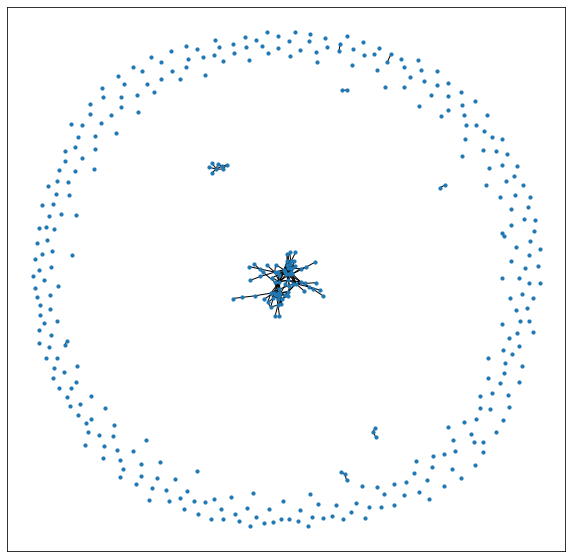

In [60]:
plt.figure(figsize =(10, 10))
nx.draw_networkx(G, node_size=10, with_labels=False)

In [74]:
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True) if len(c)!=1]

[71, 8, 3, 3, 2, 2, 2, 2, 2, 2]

In [71]:
sum([len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True) if len(c)==1])

304

In [75]:
clusters = [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [77]:
for c in clusters:
    c = list(c)
    c = [str(i) for i in c]
    counties = df[df['ags5'].isin(c)]
    if len(counties)!=1:
        print(list(counties['kreis']))

['Segeberg', 'Stormarn', 'Hamburg', 'Hannover', 'Diepholz', 'Lüneburg', 'Stade', 'Düsseldorf', 'Krefeld', 'Mülheim an der Ruhr', 'Wuppertal', 'Mettmann', 'Rhein-Kreis Neuss', 'Bonn', 'Köln', 'Euskirchen', 'Rheinisch-Bergischer Kreis', 'Rhein-Sieg-Kreis', 'Gelsenkirchen', 'Dortmund', 'Ennepe-Ruhr-Kreis', 'Olpe', 'Siegen-Wittgenstein', 'Kreisfreie Stadt Frankfurt am Main', 'Groß-Gerau', 'Main-Taunus', 'Offenbach', 'Stadt Worms', 'Südliche Weinstraße', 'Rhein-Pfalz-Kreis', 'Mainz-Bingen', 'Stuttgart', 'Böblingen', 'Esslingen', 'Göppingen', 'Ludwigsburg', 'Rems-Murr-Kreis', 'Heilbronn, Stadt', 'Heilbronn, Kreis', 'Schwäbisch Hall', 'Ostalbkreis', 'Karlsruhe, Stadt', 'Karlsruhe, Kreis', 'Rastatt', 'Rhein-Neckar-Kreis', 'Pforzheim', 'Enzkreis', 'Freudenstadt', 'Freiburg im Breisgau', 'Breisgau-Hochschwarzwald', 'Schwarzwald-Baar-Kreis', 'Konstanz', 'Lörrach', 'Waldshut', 'Reutlingen', 'Zollernalbkreis', 'Ulm', 'Alb-Donau-Kreis', 'Sigmaringen', 'Ingolstadt', 'München, Landeshauptstadt', 'Fürs

### -----------------------------------------------------------------------------------------------------------------------------
### inefficient code

In [ ]:
# kreise1 = []
# kreise2 = []
# source = []
# target = []
# value = []
# size = list(df['kr_ka_au_202104'])

# for col in range(400):
#     for row in range(col,400):
#         ratio = df_kr_alq_corr.transpose().corr().iloc[col][row]
#         # logging
#         if (col in list(range(0,401,10))) and (row in list(range(0,401,10))) and (col==row):
#             print(f'{col} rows processed ...')
#         # high correlation
#         if (ratio>0.99) and (ratio<1):
#             ags5 = df_kr_alq_corr.transpose().corr().index
#             kreise1.append(ags5[col])
#             kreise2.append(ags5[row])
#             source.append(col)
#             target.append(row)
#             value.append(ratio)

In [ ]:
# match = pd.DataFrame({'kreise1': kreise1, 'kreise2': kreise2,
#                       'source': source, 'target': target,
#                       'value': value})

In [ ]:
# match['group'] = match['kreise1'].astype(str).str[:2]
# # match['bd1'] = match['kreise1'].str[:2]
# # match['bd2'] = match['kreise2'].str[:2]

In [ ]:
# linksdf = match[['source', 'target', 'value', 'group']]
# #links = linksdf.to_dict('index')
# links = linksdf.T.to_dict().values()
# links = str(links)[12:-1].replace("'", '"')

In [ ]:
# nodesdf = df[['ags5', 'ags2', 'kr_ka_au_202009']]
# nodesdf.columns = ['name', 'group', 'size']
# nodes = nodesdf.T.to_dict().values()
# nodes = str(nodes)[12:-1].replace("'", '"')

In [ ]:
# network = '{"nodes": ' + nodes + ', "links": ' + links + '}'

# with open('network.txt', 'w') as writer:
#     writer.write(network)

In [ ]:
# plt.figure(figsize=(20,20))

# G01 = nx.from_pandas_edgelist(match[match['group']=='01'], source='kreise1', target='kreise2')
# G02 = nx.from_pandas_edgelist(match[match['group']=='02'], source='kreise1', target='kreise2')
# G03 = nx.from_pandas_edgelist(match[match['group']=='03'], source='kreise1', target='kreise2')
# G04 = nx.from_pandas_edgelist(match[match['group']=='04'], source='kreise1', target='kreise2')
# G05 = nx.from_pandas_edgelist(match[match['group']=='05'], source='kreise1', target='kreise2')
# G06 = nx.from_pandas_edgelist(match[match['group']=='06'], source='kreise1', target='kreise2')
# G07 = nx.from_pandas_edgelist(match[match['group']=='07'], source='kreise1', target='kreise2')
# G08 = nx.from_pandas_edgelist(match[match['group']=='08'], source='kreise1', target='kreise2')
# G09 = nx.from_pandas_edgelist(match[match['group']=='09'], source='kreise1', target='kreise2')
# G10 = nx.from_pandas_edgelist(match[match['group']=='10'], source='kreise1', target='kreise2')
# G11 = nx.from_pandas_edgelist(match[match['group']=='11'], source='kreise1', target='kreise2')
# G12 = nx.from_pandas_edgelist(match[match['group']=='12'], source='kreise1', target='kreise2')
# G13 = nx.from_pandas_edgelist(match[match['group']=='13'], source='kreise1', target='kreise2')
# G14 = nx.from_pandas_edgelist(match[match['group']=='14'], source='kreise1', target='kreise2')
# G15 = nx.from_pandas_edgelist(match[match['group']=='15'], source='kreise1', target='kreise2')
# G16 = nx.from_pandas_edgelist(match[match['group']=='16'], source='kreise1', target='kreise2')

# Gmatch = nx.from_pandas_edgelist(match, source='kreise1', target='kreise2')
# pos = nx.spring_layout(Gmatch)
# options = {'node_size':50, 'alpha':1, 'width':0.1, 'font_size':8}

# nx.draw_networkx(G01, pos, with_labels=True, node_color="#d3d3d3", label='01', **options)
# nx.draw_networkx(G02, pos, with_labels=True, node_color="#9c9d97", label='02', **options)
# nx.draw_networkx(G03, pos, with_labels=True, node_color="#474f52", label='03', **options)
# nx.draw_networkx(G04, pos, with_labels=True, node_color="#1d1c21", label='04', **options)
# nx.draw_networkx(G05, pos, with_labels=True, node_color="#ffd83d", label='05', **options)
# nx.draw_networkx(G06, pos, with_labels=True, node_color="#f9801d", label='06', **options)
# nx.draw_networkx(G07, pos, with_labels=True, node_color="#b02e26", label='07', **options)
# nx.draw_networkx(G08, pos, with_labels=True, node_color="#825432", label='08', **options)
# nx.draw_networkx(G09, pos, with_labels=True, node_color="#80c71f", label='09', **options)
# nx.draw_networkx(G10, pos, with_labels=True, node_color="#5d7c15", label='10', **options)
# nx.draw_networkx(G11, pos, with_labels=True, node_color="#3ab3da", label='11', **options)
# nx.draw_networkx(G12, pos, with_labels=True, node_color="#169c9d", label='12', **options)
# nx.draw_networkx(G13, pos, with_labels=True, node_color="#3c44a9", label='13', **options)
# nx.draw_networkx(G14, pos, with_labels=True, node_color="#f38caa", label='14', **options)
# nx.draw_networkx(G15, pos, with_labels=True, node_color="#c64fbd", label='15', **options)
# nx.draw_networkx(G16, pos, with_labels=True, node_color="#8932b7", label='16', **options)

# plt.legend()
# plt.show()

### -----------------------------------------------------------------------------------------------------------------------------
### making sense of the clusters

In [ ]:
# cluster1 = df_kr_alq[df_kr_alq['kreis'].isin(['Wesel', 'Unna', 'Nürnberg'])][filter_col]
# cluster1.shape

In [ ]:
# plt.plot(cluster1.columns, cluster1.iloc[0], 'go-', label='Wesel', linewidth=2)
# plt.plot(cluster1.columns, cluster1.iloc[1], 'bo-', label='Unna', linewidth=2)
# plt.plot(cluster1.columns, cluster1.iloc[2], 'ro-', label='Nürnberg', linewidth=2)
# plt.xticks(rotation=45)
# plt.ylim(1.5, 8.5)
# plt.legend()

In [ ]:
# cluster1

In [ ]:
#kr_firm = [22295, 17645, 29263] #>75%

In [ ]:
# Wesel is a city in North Rhine-Westphalia, Germany. It is the capital of the Wesel district.
# Unna is a city of around 57,000 people in North Rhine-Westphalia, Germany, the seat of the Unna district.
# Nuremberg is the second-largest city of the German state of Bavaria after its capital Munich, and its 518,370 inhabitants make it the 14th-largest city in Germany.

In [ ]:
# cluster2 = df_kr_alq[df_kr_alq['kreis'].isin(['Fulda', 'Neuwied', 'Gotha'])][filter_col]
# cluster2.shape

In [ ]:
# plt.plot(cluster2.columns, cluster2.iloc[0], 'go-', label='Fulda', linewidth=2)
# plt.plot(cluster2.columns, cluster2.iloc[1], 'bo-', label='Neuwied', linewidth=2)
# plt.plot(cluster2.columns, cluster2.iloc[2], 'ro-', label='Gotha', linewidth=2)
# plt.xticks(rotation=45)
# plt.ylim(1.5, 8.5)
# plt.legend()

In [ ]:
# cluster3 = df_kr_alq[df_kr_alq['kreis'].isin(
#     ['Ortenaukreis', 'Dachau', 'Ebersberg', 'Erding', 'Freising', 'Landsberg am Lech', 
#      'Erlangen-Höchstadt', 'Dillingen a.d.Donau'])][filter_col]
# cluster3.shape

In [ ]:
# plt.plot(cluster3.columns, cluster3.iloc[0], 'go-', label='Ortenaukreis', linewidth=2)
# plt.plot(cluster3.columns, cluster3.iloc[1], 'bo-', label='Dachau', linewidth=2)
# plt.plot(cluster3.columns, cluster3.iloc[2], 'ro-', label='Ebersberg', linewidth=2)
# plt.plot(cluster3.columns, cluster3.iloc[3], 'co-', label='Erding', linewidth=2)
# plt.plot(cluster3.columns, cluster3.iloc[4], 'mo-', label='Freising', linewidth=2)
# plt.plot(cluster3.columns, cluster3.iloc[5], 'yo-', label='Landsberg am Lech', linewidth=2)
# plt.plot(cluster3.columns, cluster3.iloc[6], 'ko-', label='Erlangen-Höchstadt', linewidth=2)
# plt.plot(cluster3.columns, cluster3.iloc[7], 'wo-', label='Dillingen a.d.Donau', linewidth=2)
# plt.xticks(rotation=45)
# plt.ylim(1.5, 8.5)
# plt.legend()

In [ ]:
# plt.plot(cluster1.columns, cluster1.iloc[0], 'go-', label='Wesel', linewidth=2)
# plt.plot(cluster1.columns, cluster1.iloc[1], 'bo-', label='Unna', linewidth=2)
# plt.plot(cluster1.columns, cluster1.iloc[2], 'ro-', label='Nürnberg', linewidth=2)

# # plt.plot(cluster2.columns, cluster2.iloc[0], 'co-', label='Fulda', linewidth=2)
# # plt.plot(cluster2.columns, cluster2.iloc[1], 'mo-', label='Neuwied', linewidth=2)
# # plt.plot(cluster2.columns, cluster2.iloc[2], 'yo-', label='Gotha', linewidth=2)

# plt.plot(cluster3.columns, cluster3.iloc[3], 'co-', label='Erding', linewidth=2)
# plt.plot(cluster3.columns, cluster3.iloc[4], 'mo-', label='Freising', linewidth=2)
# plt.plot(cluster3.columns, cluster3.iloc[5], 'yo-', label='Landsberg am Lech', linewidth=2)

# plt.xticks(rotation=45)
# #plt.legend()
# plt.show()